# __Wordle analysis__

NB: This project is for fun! don't expect any meanfull information out of it XD.

Long story short I found a dataset on kaggle about Wordle tweets (~20k daily tweets).

Dataset link: https://www.kaggle.com/vora1011/wordletweets

### __Imports__

In order to perform the analysis needed, all that we need is re for regex, pandas, numpy and finally matplotlib.pyplot.

In [1]:
import re
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

### __Loading Data__

To do so, we simply use pandas's read_csv function and give it the file of the dataSet (it is stored as csv file named "WordleMegaData" in the working directory).

we use the head method to inspect the data, we find that there is 10 columns and they are as follows:

*WordleID, ID, Created_At, Text, Source, UserID, Username, User_ScreenName, Location, Truncated*

In [2]:
wordle_data = pd.read_csv("WordleMegaData.csv")

wordle_data.head()

,WordleID,ID,Created_At,Text,Source,UserID,Username,User_ScreenName,Location,Truncated
0,254,1498447921448034305,2022-02-28 23:59:58+00:00,Wordle 254 3/6\n\n🟨🟨⬛⬛⬛\n🟨⬛🟨⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,36816757,Leslie Brown,live_laugh_pray,Haida Gwaii,False
1,254,1498447918184996864,2022-02-28 23:59:58+00:00,Wordle 254 4/6\n\n⬛⬛⬛⬛🟩\n⬛⬛⬛⬛🟩\n⬛🟩⬛⬛🟩\n🟩🟩🟩🟩🟩\n...,Twitter for iPhone,482591014,Dylan Sobo,DaBolt727,"Largo, FL / Bradenton|FGCU",False
2,254,1498447910173921282,2022-02-28 23:59:56+00:00,Wordle 254 3/6\n\n⬛⬛⬛⬛🟩\n⬛⬛🟩⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,1397624255626584074,🖤,wengojos,23 • she/her • 🇵🇭🇺🇸,False
3,254,1498447901797801989,2022-02-28 23:59:54+00:00,Wordle 254 3/6\n\n⬛⬛⬛🟨⬛\n⬛🟨⬛⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,1255905442548473856,Dustin Waters,DustinWaters12,NaN,False
4,254,1498447896911527938,2022-02-28 23:59:53+00:00,Wordle 254 3/6\n\n⬛🟨⬛⬛⬛\n🟩🟩🟩⬛🟩\n🟩🟩🟩🟩🟩,Twitter for iPhone,252893719,R. Colin,rollin_fatty,"Richmond, VA",False


## __Analysis__

#### __Puzzles count__
The data that we have concerns 10 daily puzzles from 254 to 263.

In [3]:
unique_wordle = wordle_data["WordleID"].unique()

print(f"The data is for {len(unique_wordle)} days")
print(f"the wordles in questions have the ID: {' '.join(list(map(str, list(unique_wordle))))}")


The data is for 10 days
the wordles in questions have the ID: 254 255 256 257 258 259 260 261 262 263


#### __Unique users__
We first drop most of the columns and only keep *WordleID, Text, UserID* (Not necessary XD).

we use the value_counts on the DataFrame to find the users with the highst number of tweets.

(Weirdly enough we have 10 puzzles and the first user have 24 tweets XD)

In [4]:
wordle_df = wordle_data[["WordleID", "Text", "UserID"]].copy()

wordle_data[["UserID", "Username", "User_ScreenName"]].value_counts()[:10]

UserID               Username            User_ScreenName
33133896             🌙~starbuck1127~🌙    starbuck1127       24
1481455108558893060  @SussexWordle       sussexwordle       22
29471238             steve               bagshaw2112        17
53727542             boa noite           taisatbm           15
87145454             kibar feyzo 🌈       emreb7_            14
1491928048840720444  NYT Wordle          nytwordle          14
15061519             Allyson M. W. Dyar  Allyson13          13
1426147754           Eugene              Eugene646          13
1497251207978487810  Michael Stire       MichaelStire70     12
22614685             Sue Henderson 💙     Hathorsdaughter    12
dtype: int64

### __Get the scores__
To do so we will use a simple regex since the score always starts with *Wordle NNN N/6* we are only interested in the "N/6" part.

If the score was "X/6" it means the player failed, else the user won and N represents the number of tries.

In [5]:
regex = re.compile("[\\d,X]\/6")
def get_score(text):
    match = regex.findall(text)

    try:
        return int(match[0][0])
    except ValueError:
        return -1 if match[0][0] == "X" else 0
    except IndexError:
        return 0


wordle_df["Score"] = wordle_df["Text"].apply(lambda row: get_score(row))
wordle_df = wordle_df.drop("Text", axis=1)
wordle_df.head()

,WordleID,UserID,Score
0,254,36816757,3
1,254,482591014,4
2,254,1397624255626584074,3
3,254,1255905442548473856,3
4,254,252893719,3


In [6]:
# we filter data to remove the score 0 because it means there was no match for a wordle score

wordle_df = wordle_df[wordle_df["Score"].isin([-1,1,2,3,4,5,6])]

# we group the data using WordlID and Score
daily_scores = wordle_df.groupby(["WordleID", "Score"]).count().reset_index()
daily_scores.head()

,WordleID,Score,UserID
0,254,-1,153
1,254,1,378
2,254,2,1913
3,254,3,5925
4,254,4,6668


In [7]:
unique_wordle = list(unique_wordle)
scores = [[daily_scores["UserID"][i+j] for i in range(len(unique_wordle))]for j in range(7)]
scores.append(scores.pop(0))

### __Final results__
We plot the result using a bar plot that group the puzzles and scores.

We notice that:
- Wordle 258 was the hardest puzzle in this sample since the largest score failure.
- The most answered puzzle was 254 since it was the least failed by the users.
- Wordle 257 presents weird results since either players got it at the first try or they failed.

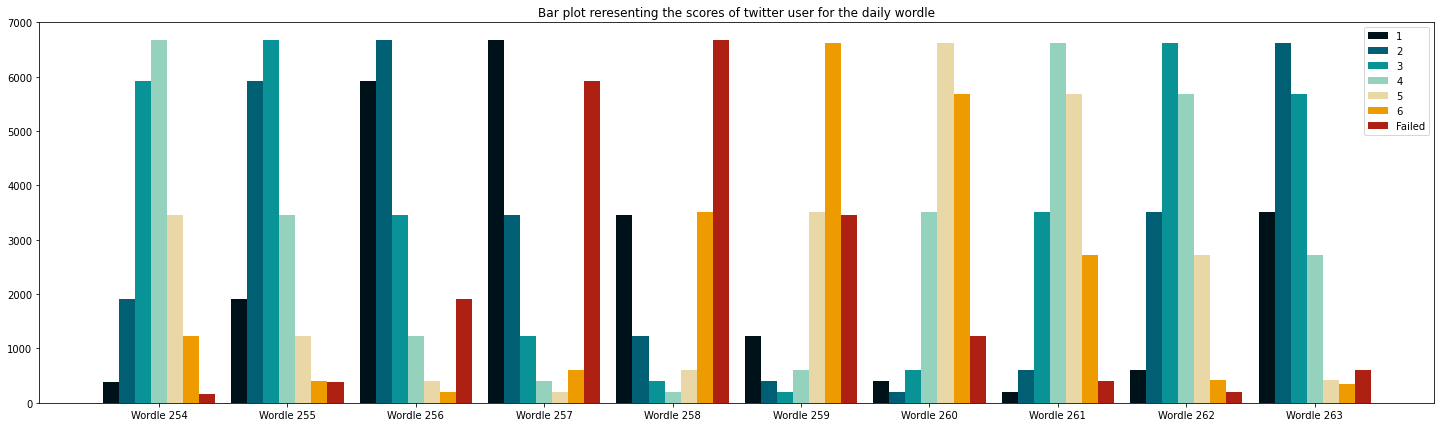

In [8]:
plt.figure(figsize=[25, 7])
colors = ["#001219", "#005f73", "#0a9396", "#94d2bd", "#e9d8a6", "#ee9b00", "#ae2012"]
x = np.arange(len(unique_wordle))

for i, value in enumerate(scores):
    plt.bar(x + .125*i, value, color = colors[i], width = 0.125)

plt.legend([1,2,3,4,5,6,"Failed"])
plt.xticks([i + .375 for i in range(len(unique_wordle))], [f'Wordle {i}' for i in unique_wordle])
plt.title("Bar plot reresenting the scores of twitter user for the daily wordle")
plt.show()